In [449]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# This is used as a hack in Jupyter Notebook to make seabron plots bigger. Call before making a plot.
def setplt(r=1, c=1, w=15, h=9, **kwargs):
    f, axs = plt.subplots(r, c, figsize=(w, h), **kwargs)
    sns.despine(f, left=True, bottom=True)
    return axs

# Welcome to Data Visualization! 

### Our Datasets 

We are using a pokemon dataset from Kaggle and a bike share data set that was extracted from Capital Bike Share data.

### Our Procedure

We are going to go over categorical data approaches and time series data approaches. 

### Step 1: Load in the Data

In [85]:
pokemon = pd.read_csv('pokemon.csv')
fivebikes = pd.read_csv('fivebikes.csv')

## Categorical Data 

We're going to use pokemon data to play around with categorical plotting. When we are plotting non-quantitative values, we want to focus on bar graphs, heat maps, and flow charts. Aggregating our data gives more options, but our options for categorical data are limited. 

In [99]:
pokemon.head() # Print out the first few lines of data 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Countplot

A seaborn technique that will group data for us automatically. 

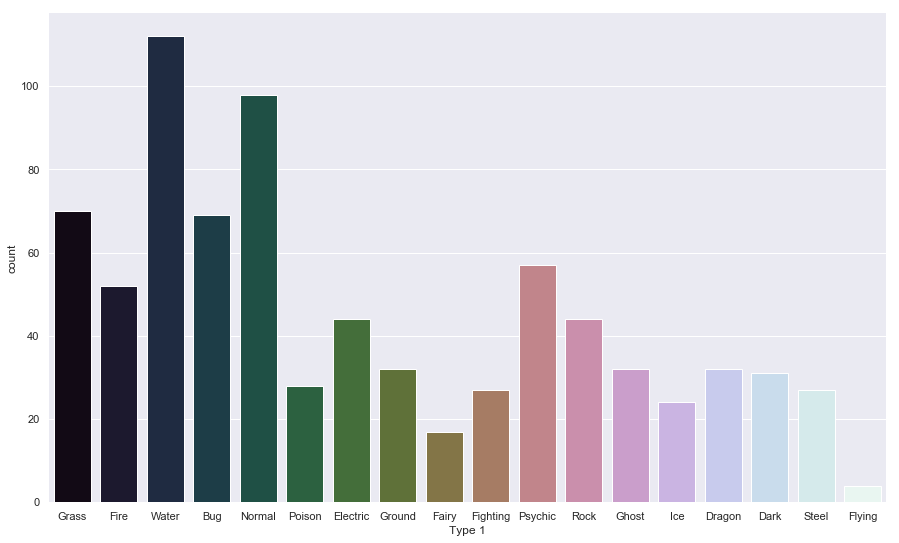

In [159]:
setplt() # Our hack from earlier

countplt = sns.countplot(x = 'Type 1', data = pokemon, palette='cubehelix')

### Heatmaps

Let's experiment with pivot tables to make heatmaps. 

In [142]:
# pd.pivot_table(data, values, index, columns, aggfunc) # This is our function

# pd.pivot_table(pokemon, values='Attack', index='Type 1', columns=['Generation'], aggfunc='count')

# pd.pivot_table(pokemon, values='Attack', index='Type 1', columns=['Legendary'], aggfunc='mean')

In [190]:
genpivot = pd.pivot_table(pokemon, values='Total', index='Type 1', columns=['Generation'], aggfunc='mean')
legpivot = pd.pivot_table(pokemon, values='Attack', index='Type 1', columns=['Legendary'], aggfunc='mean')

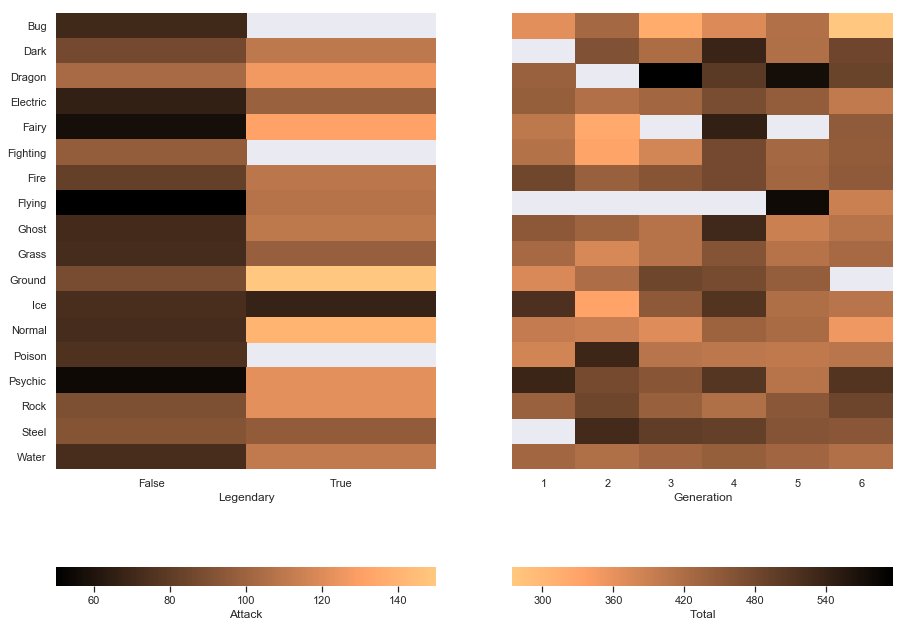

In [450]:
plt2 = setplt(1,2, h=12, sharey=True, squeeze=True)

heatmap1 = sns.heatmap(genpivot, ax=plt2[1], cmap='copper_r', 
                       cbar_kws={'label': 'Total', 'orientation':'horizontal'}).set(ylabel='')
heatmap2 =sns.heatmap(legpivot, ax=plt2[0], cmap='copper', 
                      cbar_kws={'label': 'Attack', 'orientation':'horizontal'}).set(ylabel='')

## Time Series Visualization

We're going to be looking at time series data from a bike share company in Washington, D.C. Time series data is fun to visualize because it's easy for a wide audience to understand and is visually pleasing. 

In [367]:
# first we need to convert our week columnd into date time using pd.to_datetime

fivebikes['week'] = pd.to_datetime(fivebikes['week'], utc=True)

In [368]:
# Group by week and then assign a dataframe called fivebikeavg that has one column for 'sum'

# fivebikes.groupby('week')

# fivebikes.groupby('week').mean()

# fivebikes.groupby('week').mean()['sum']

In [369]:
fivebikeavg = fivebikes.groupby('week').mean()['sum']

Text(0.5,1,'Total Minutes per Week per Bike vs. Date ')

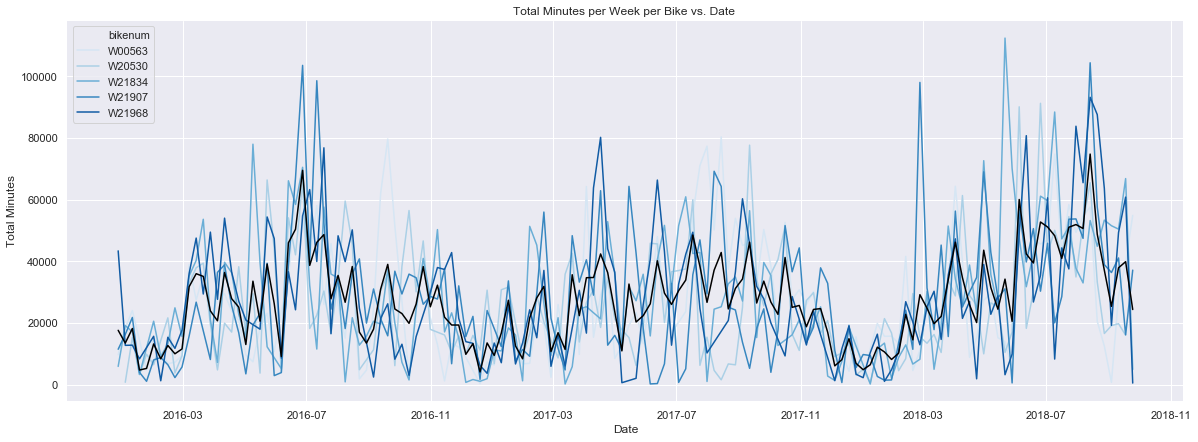

In [426]:
# Using our function from earlier
plt3 = setplt(w=20, h=7)

# Assign the graphs
fivebikeseries = (sns.lineplot(x='week', y='sum', hue='bikenum', data=fivebikes, palette='Blues', ax=plt3)
             .set(ylabel='Total Minutes', xlabel='Date'))

bikeavg = sns.lineplot(data=fivebikeavg, color='black')

# Set the title
plt3.set_title('Total Minutes per Week per Bike vs. Date ')

Now we're going to look at one individual bike and use a filter function. 

In [323]:
# Filter by the bikenum = 'W21834' and assign it to a dataframe called onebike

# fivebikes['bikenum']

# fivebikes[fivebikes['bikenum']]

# fivebikes[fivebikes['bikenum'] == 'W21834']

In [269]:
onebike = fivebikes[fivebikes['bikenum'] == 'W21834']

In [314]:
# Importing some libraries to smooth our data

from scipy.signal import savgol_filter
from scipy import signal

x = onebike['week']

filter_order = 4 #specifies how many filter coefficients should be used
filter_cutoff = (1/14) # inverse of the time interval in the timeseries

coef1, coef2 = signal.butter(filter_order, filter_cutoff, btype='lowpass')

y = signal.filtfilt(one,two,onebike['sum'])

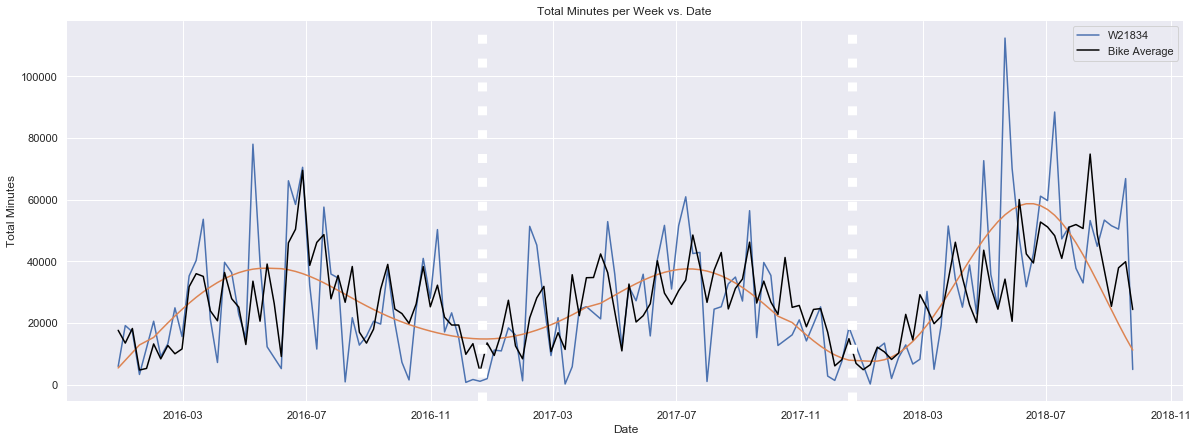

In [448]:
# Putting it all together, plotting winter solstices

plt4 = setplt(w=20, h=7)

oneseries = (sns.lineplot(x='week', y='sum', data=onebike, palette='Blues', label='W21834'))
filtered = sns.lineplot(x, y, palette='Oranges')
bikeavg = sns.lineplot(data=fivebikeavg, color='black', label='Bike Average')

oneseries.set(xlabel='Date', ylabel='Total Minutes')

plt4.set_title('Total Minutes per Week vs. Date ')
plt4.legend()

for t in ['2016-12-21', '2017-12-21']:
    plt.axvline(t, color='white', linewidth=9, linestyle=':')